In [42]:
import pandas as pd
import numpy as np

In [43]:
earnings_data = pd.read_csv("earnings.csv")

In [44]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 300
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

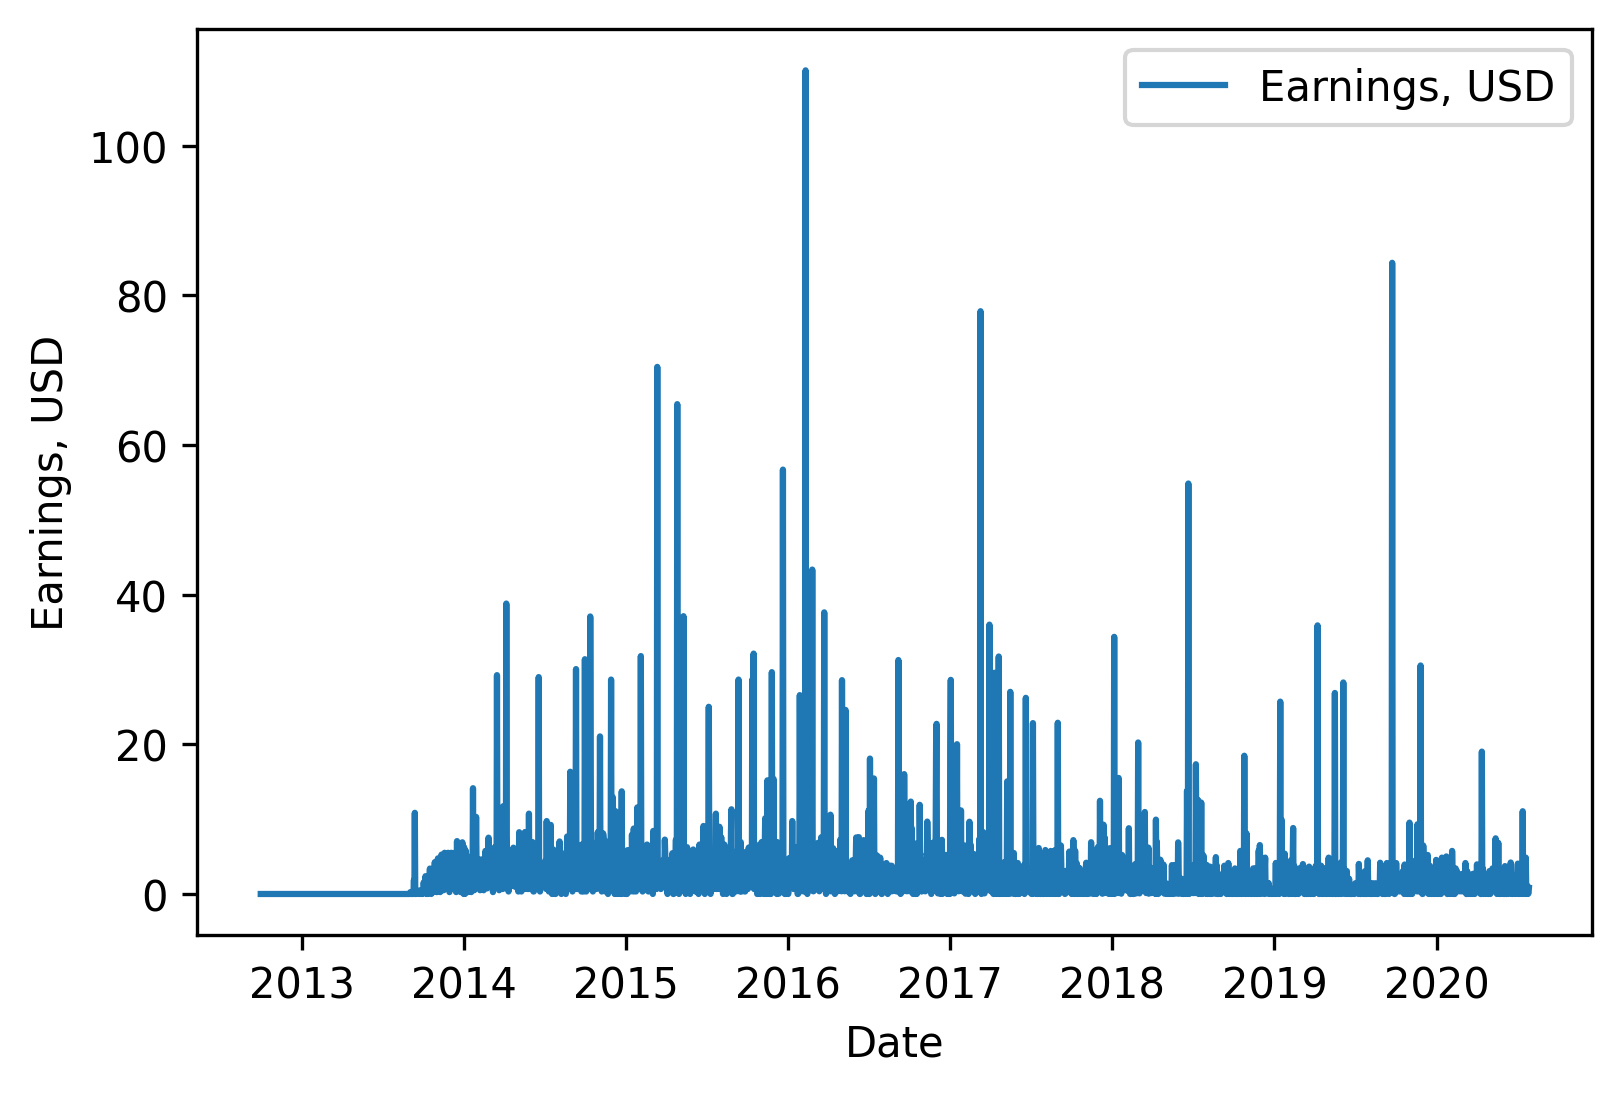

In [116]:
dates = pd.to_datetime(earnings_data['Date'])

plt.plot_date(dates, earnings_data['Daily Total'], label = "Earnings, USD", fmt='-')
plt.xlabel('Date')
plt.ylabel('Earnings, USD')
plt.legend()

plt.show()

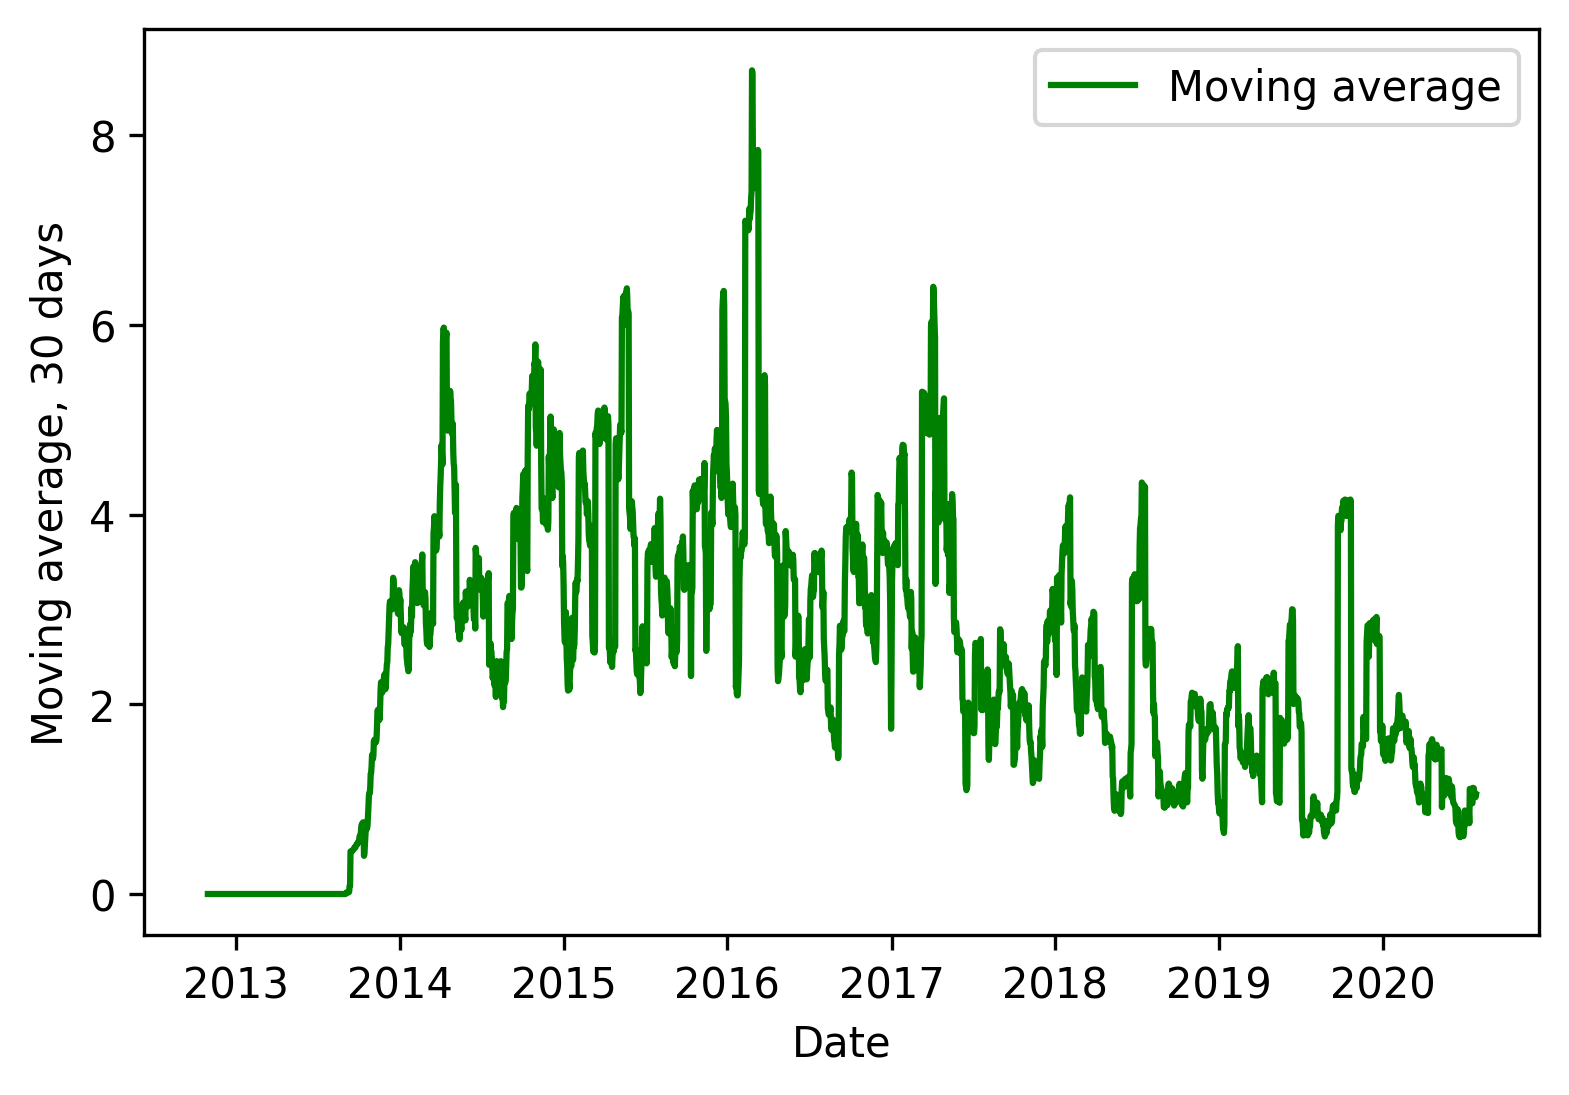

In [181]:
rolling_mean = earnings_data['Daily Total'].rolling(30).mean()
#plt.plot_date(dates, earnings_data['Daily Total'], color='#eeeeee', fmt='-', label = "Earnings")
plt.plot_date(dates, rolling_mean, color='g', fmt='-', label = "Moving average")

plt.xlabel('Date')
plt.ylabel('Moving average, 30 days')
plt.legend()

plt.show()

Slope: -0.0010351710983862127
Intercept: 4.042743805287226
Yearly decrease: 10.309607241663699


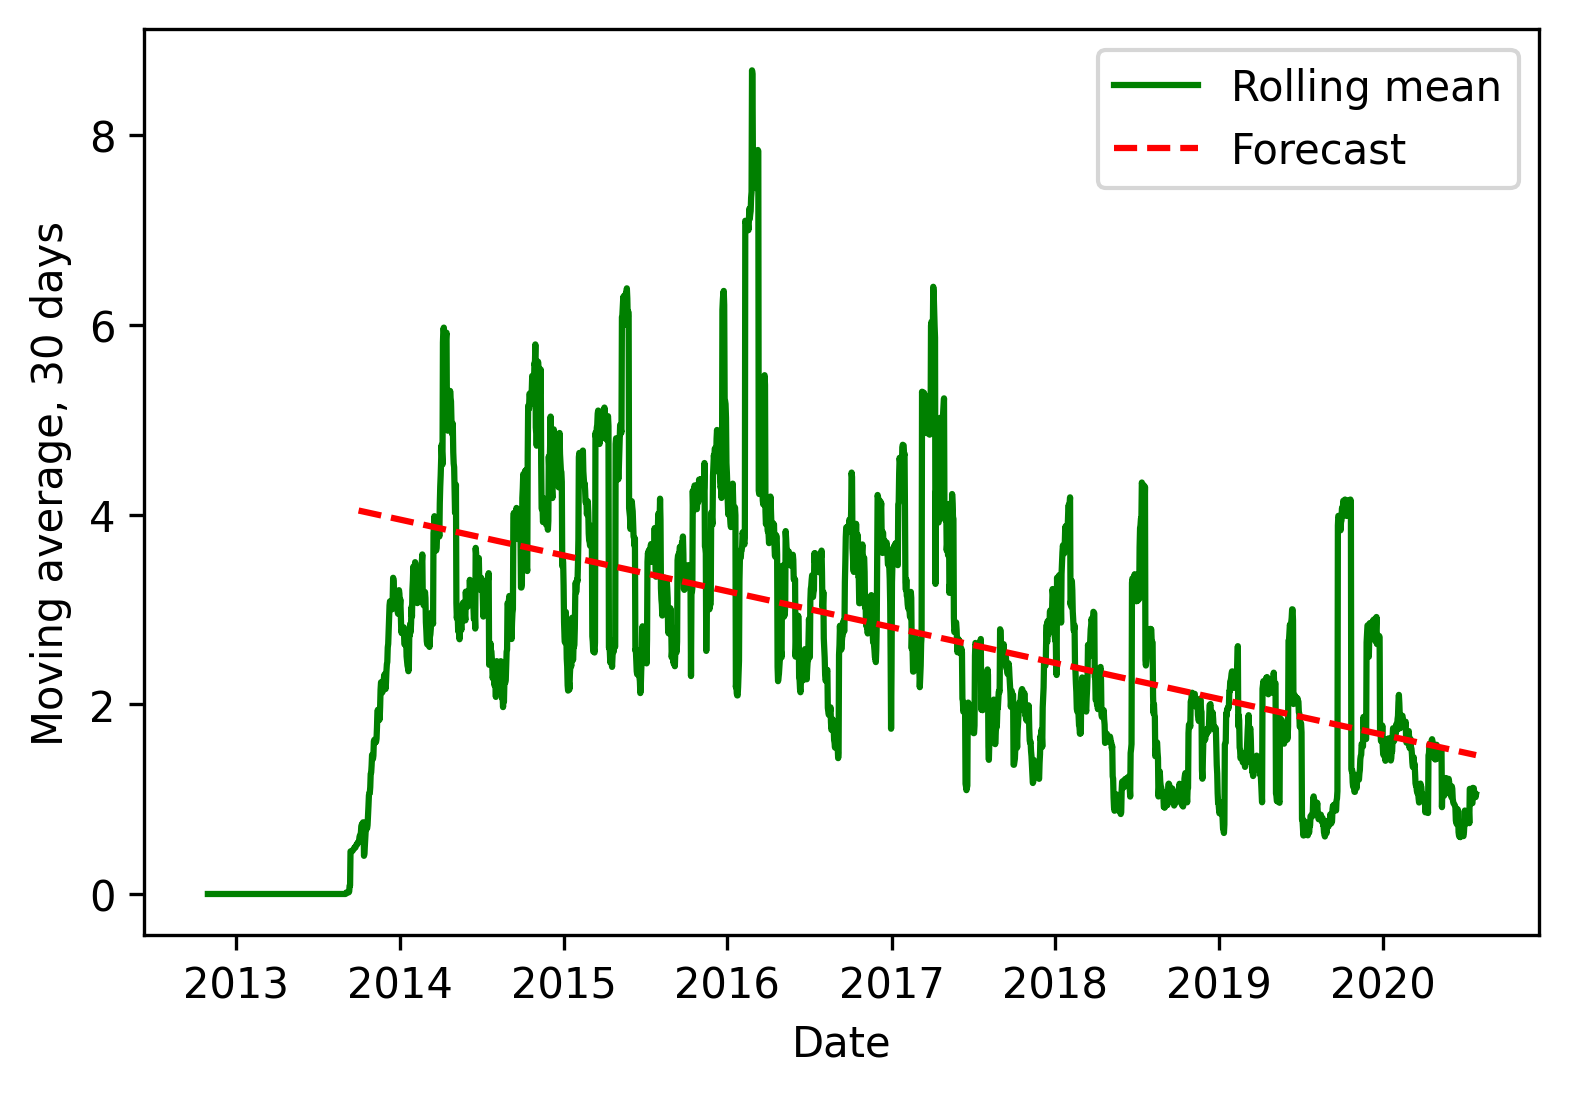

In [144]:
plt.plot_date(dates, rolling_mean, color='g', fmt='-', label = "Rolling mean")

start = 365
x = np.arange(len(rolling_mean[start:]))
z = np.polyfit(x, rolling_mean[start:], 1)
p = np.poly1d(z)

slope, intercept = z
print('Slope:', slope)
print('Intercept:', intercept)
rate = p(start+365)*100/p(start)
print("Yearly decrease:", 100-rate)


plt.plot_date(dates[start:], p(x), color='r', fmt='--', label = "Forecast")

ax.yaxis.set_ticks(np.arange(start, end, stepsize))

plt.xlabel('Date')
plt.ylabel('Moving average, 30 days')
plt.legend()

plt.show()

Slope: -0.0010351710983862127
Intercept: 4.042743805287226


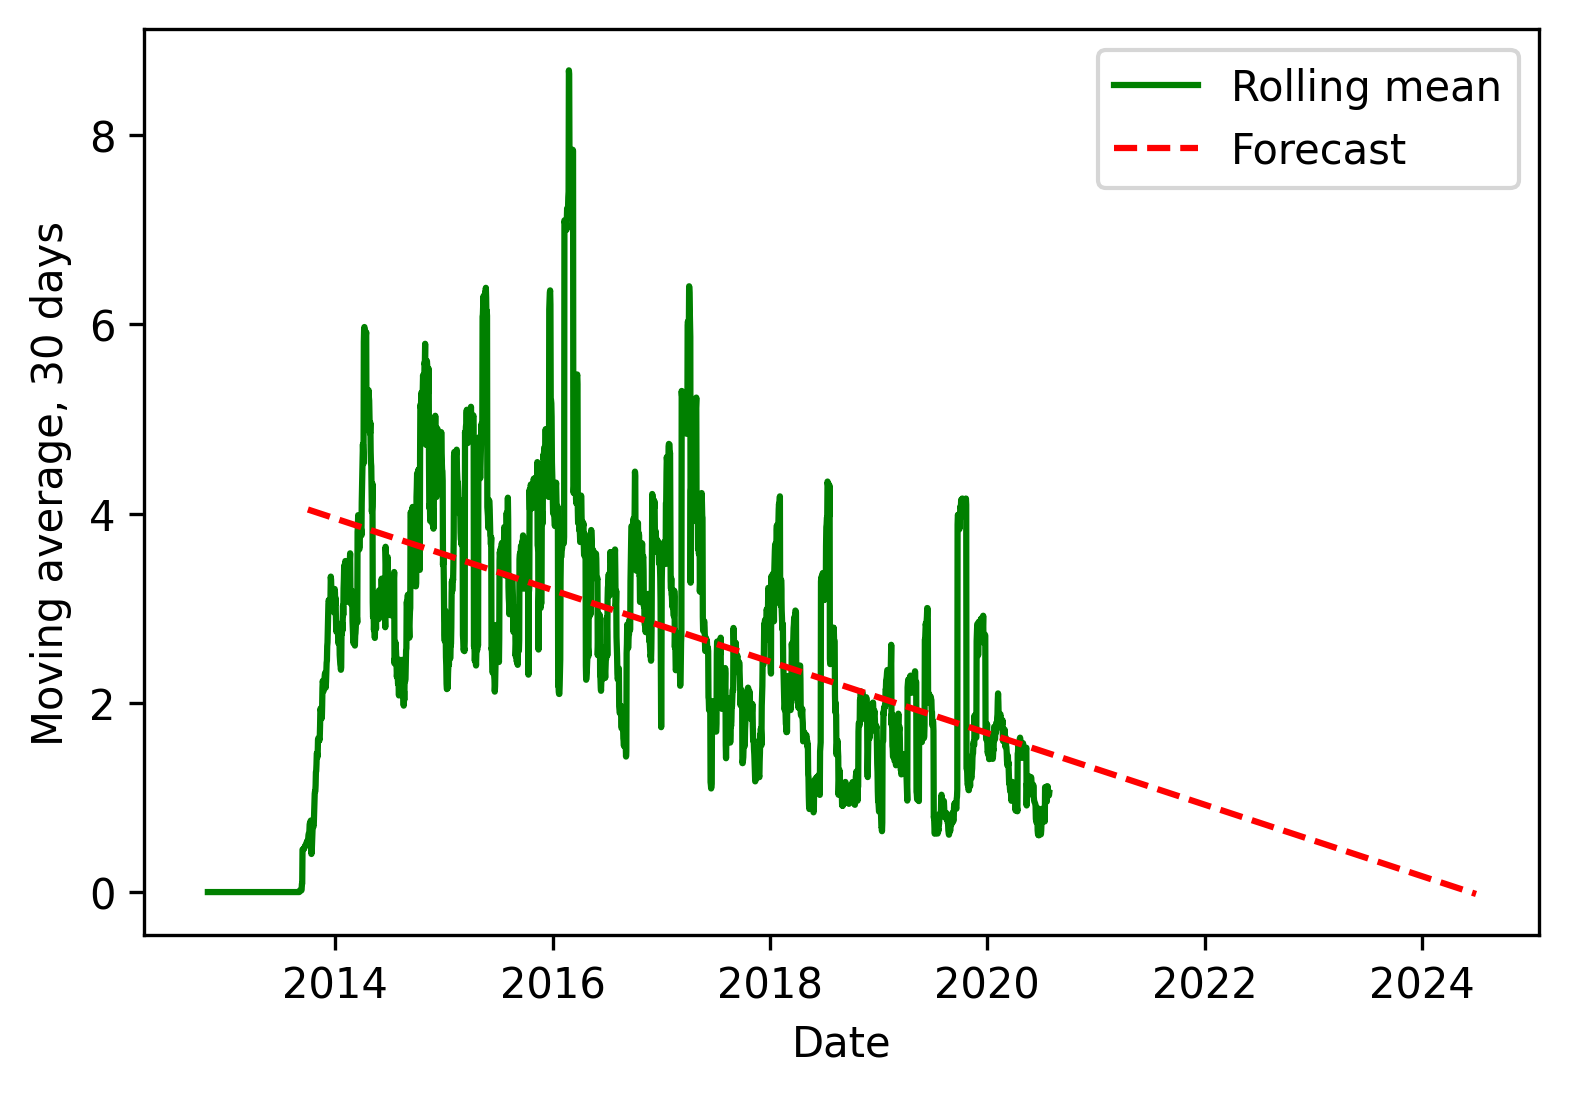

In [134]:
plt.plot_date(dates, rolling_mean, color='g', fmt='-', label = "Rolling mean")

start = 365
x = np.arange(len(rolling_mean[start:]))
z = np.polyfit(x, rolling_mean[start:], 1)
slope, intercept = z
print('Slope:', slope)
print('Intercept:', intercept)
p = np.poly1d(z)

from datetime import datetime, timedelta

t = np.arange(dates[start], datetime(2024,7,1), timedelta(days=1)).astype(datetime)
x = np.arange(len(t))
plt.plot_date(t, p(x), color='r', fmt='--', label = "Forecast")

plt.xlabel('Date')
plt.ylabel('Moving average, 30 days')
plt.legend()

plt.show()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Peak dates: ['2014-03-27' '2015-01-14' '2016-01-18' '2017-02-24' '2018-03-20'
 '2019-02-17' '2019-11-20']


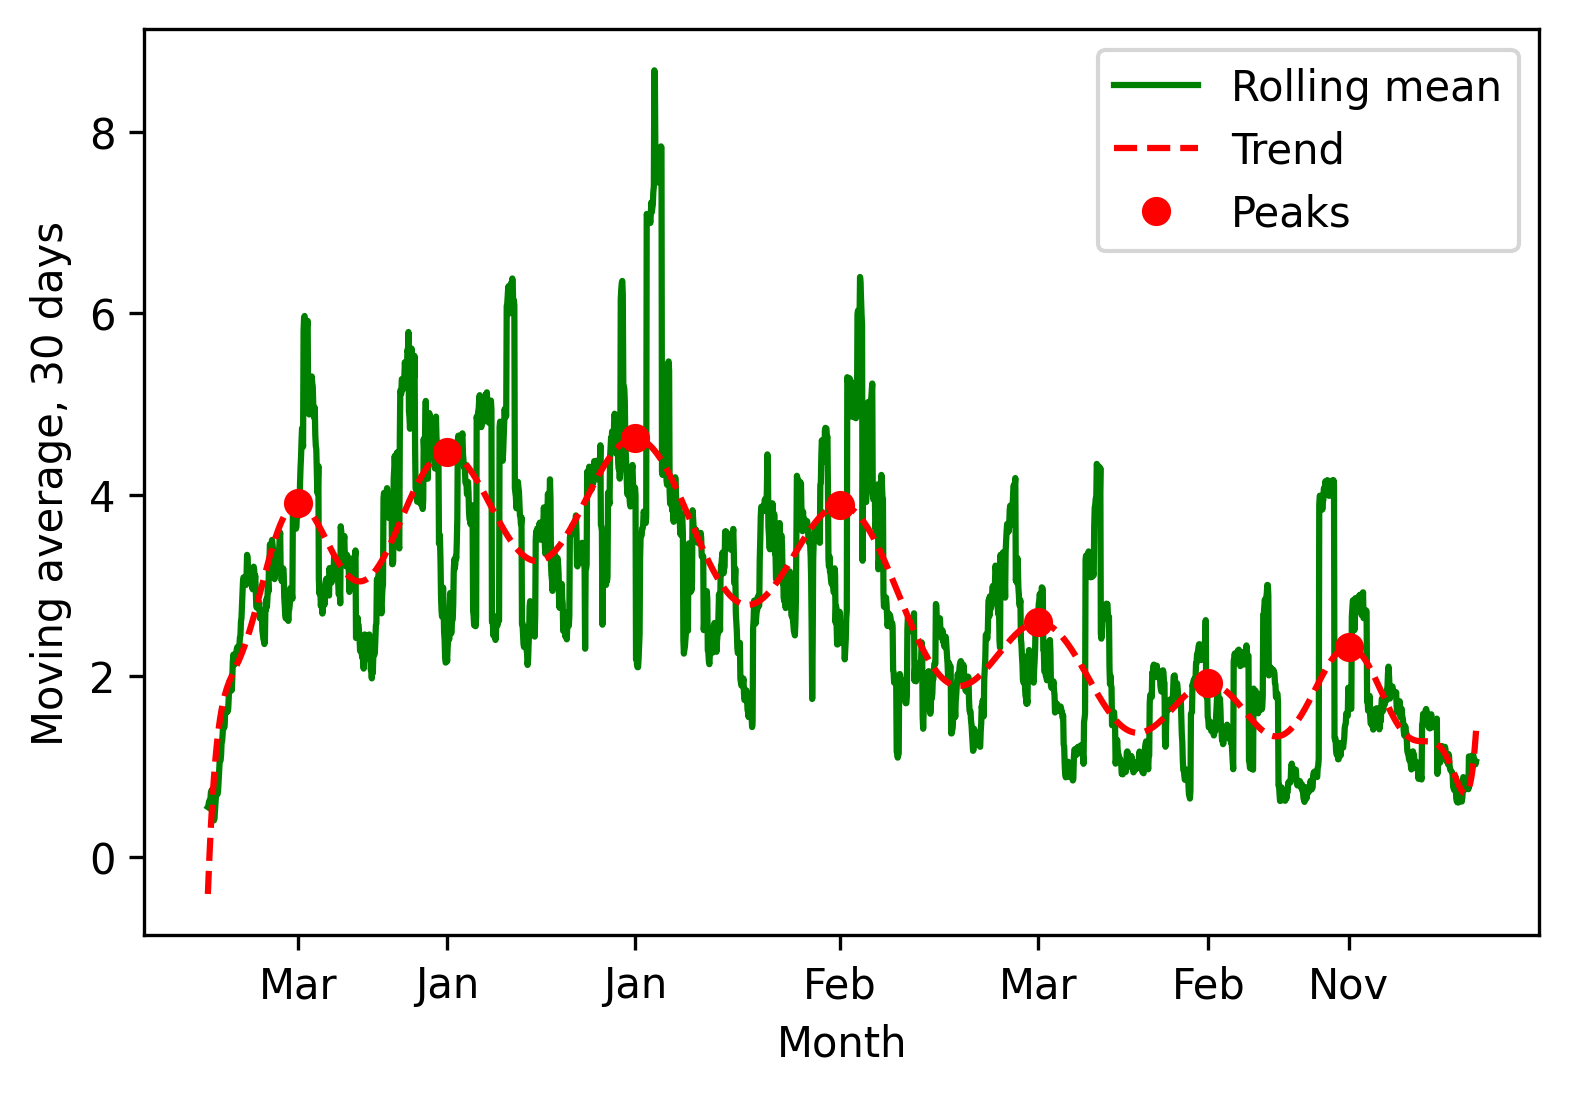

In [180]:
start = 365

plt.plot_date(dates[start:], rolling_mean[start:], color='g', fmt='-', label = "Rolling mean")

x = np.arange(len(rolling_mean[start:]))
z = np.polyfit(x, rolling_mean[start:], 34)
p = np.poly1d(z)

x_poly = np.array(dates[start:])
y_poly = p(x)
plt.plot_date(x_poly, y_poly, color='r', fmt='--', label = "Trend")

from scipy.signal import argrelextrema
indices_max = argrelextrema(y_poly, np.greater)[0][:-1]
plt.plot_date(x_poly[indices_max], y_poly[indices_max], fmt='ro', label = "Peaks")

peak_dates = np.array(earnings_data['Date'])[start:][indices_max]
print("Peak dates:", peak_dates)

plt.xticks(np.array(dates[start:])[indices_max])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b')) # 2 decimal places

plt.xlabel('Month')
plt.ylabel('Moving average, 30 days')
plt.legend()

plt.show()